In [ ]:
###importing libraries with default ###
import numpy as np
import pandas as pd
import scipy as sp
from scipy.optimize import Bounds
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, FuncFormatter
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.ticker import FixedLocator, MultipleLocator
from scipy import optimize
from scipy.signal import argrelextrema
from scipy import optimize
from scipy.signal import argrelextrema


%matplotlib inline

1\. **2D minimization of a six-hump camelback function**

$$f(x,y) = \left(4-2.1x^2+\frac{x^4}{3} \right) x^2 +xy + (4y^2 -4)y^2$$

has multiple global and local minima.

- Find the global minima of this function
- How many global minima are there, and what is the function value at those points?
- What happens for an initial guess of $(x, y) = (0, 0)$?

Hints:

* Variables can be restricted to $-2 < x < 2$ and $-1 < y < 1$.
* Use `numpy.meshgrid()` and `pylab.imshow()` to find visually the regions.
* Use `scipy.optimize.minimize()`, optionally trying its optional arguments.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: UserWarning: No contour levels were found within the data range.


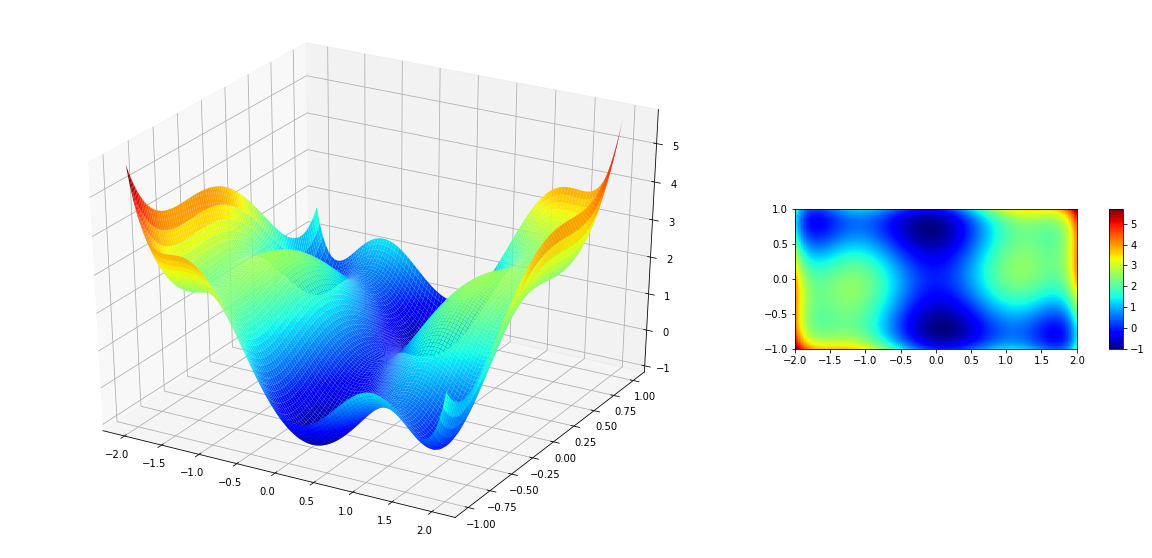

In [ ]:
#                   function definition with basically mathematic expressions to return function
def f(limitation):
    x, y = limitation
    return (4 - 2.1*x**2 + x**4/3.) * x**2 + x * y + (4*y**2 - 4) * y**2
#                  making domain 
xes=np.linspace(-2, 2, 100)
yes=np.linspace(-1, 1, 100)
x,y=np.meshgrid(xes, yes)
#                  display layout functions to
fig = plt.figure(figsize=(20,10))
axis1 = plt.subplot2grid((1, 3), (0, 0), rowspan=1, colspan=2, projection='3d')
axis2 = plt.subplot2grid((1, 3), (0, 2), rowspan=1, colspan=1)
#                     creating 3D plot function using  maping coolwarm 
axis1.plot_surface(x, y, f((x,y)), cstride=1, rstride=1, cmap='jet')
# heat map 
im = axis2.imshow(f((x,y)), cmap='jet', origin='lower', extent=[-2, 2, -1, 1])
axis2.contour(x, y, f((x,y)), cmap='jet', levels=np.arange(8, 9, 10))
#inserting colobar
divider = make_axes_locatable(axis2)
cax2 = divider.append_axes('right', size='5%', pad=0.45)
fig.colorbar(im, cax=cax2, orientation='vertical')
#display plot
plt.show()

In [ ]:
#                   [-1,1] in half and [-2,2] in three parts
bounds = [Bounds([-2, -1], [-1, 0]), Bounds([-1, -1], [1, 0]), Bounds([1, -1], [2, 0]), 
          Bounds([-2,  0], [-1, 1]), Bounds([-1,  0], [1, 1]), Bounds([1,  0], [2, 1])]
#      begin point  [x0, y0]
p0 = [[-1.5, -0.5], [0., -0.5], [1.5, -0.5],
      [-1.5,  0.5], [0.,  0.5], [1.5,  0.5]]
print("function below to minimize")
#  unzip func
for guess, bound in zip(p0, bounds):
    #apply our algorithm for result
    res = sp.optimize.minimize(f, guess, bounds=bound)
    resPar = res.x
    x_min, y_min = resPar
    print("\nx min =", x_min,"\ny min =", y_min,
          "\nf(x min, y min) =", f(resPar))

function below to minimize

x min = -1.6071049507085389 
y min = -0.5686518869296207 
f(x min, y min) = 2.1042503103122345

x min = 0.08984198536555026 
y min = -0.7126563998841553 
f(x min, y min) = -1.0316284534898743

x min = 1.7036070081642454 
y min = -0.7960838190213929 
f(x min, y min) = -0.21546382438226663

x min = -1.7036070159179797 
y min = 0.7960838104609038 
f(x min, y min) = -0.2154638243822733

x min = -0.08984199345233622 
y min = 0.7126563914989968 
f(x min, y min) = -1.031628453489875

x min = 1.6071049394396582 
y min = 0.5686518782714608 
f(x min, y min) = 2.1042503103121786


In [ ]:

    ## find the minimum with (0,0)  if we choose (0, 0) as starting point


print("minimize point (0,0)")
p0 = [0., 0.]
res = sp.optimize.minimize(f, p0)
resPar = res.x
x_min, y_min = resPar
print("x min =", x_min,"\ny min =", y_min, 
      "\nf(x min, y min) =", f(resPar))

minimize point (0,0)
x min = 0.0 
y min = 0.0 
f(x min, y min) = 0.0


2\. **Curve fitting of temperature in Alaska** 

The temperature extremes in Alaska for each month, starting in January, are given by (in degrees Celcius):

max:  `17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18`

min: `-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58`

* Plot these temperatures.
* Find a suitable a function that can describe min and max temperatures. 
* Fit this function to the data with `scipy.optimize.curve_fit()`.
* Plot the result. Is the fit reasonable? If not, why?
* Is the time offset for min and max temperatures the same within the fit accuracy?

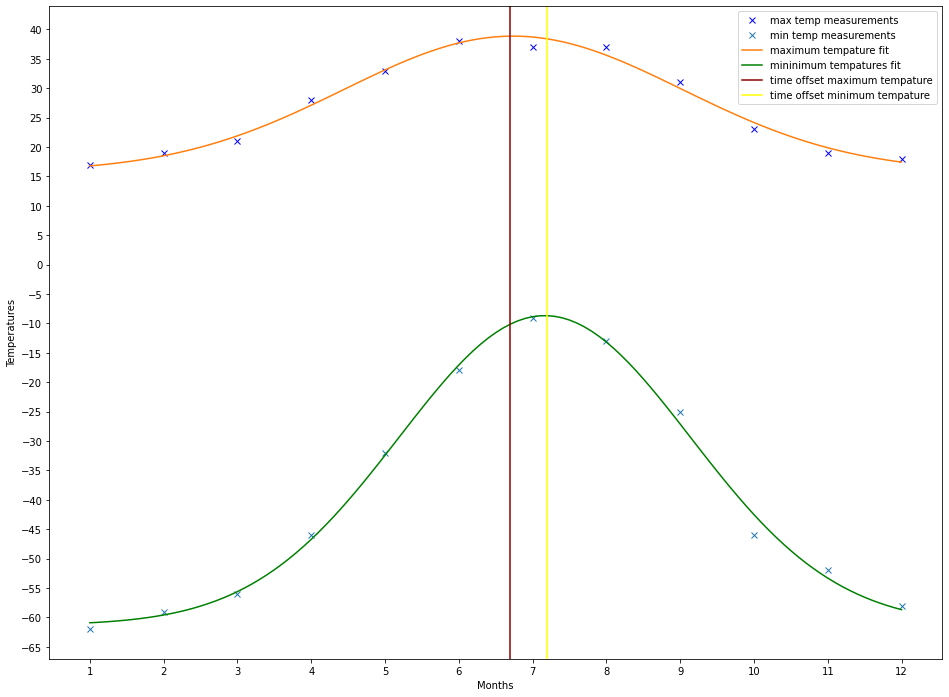

In [ ]:
tempMaxx = np.array([17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18])
tempMinn = np.array([-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58])
months = np.arange(1, 13)
##plotcodes tempature mesaurements##
fig, ax = plt.subplots(figsize=(16, 12))
ax.plot(months, tempMaxx, 'x', color='blue', label='max temp measurements')
ax.plot(months, tempMinn, 'x', label='min temp measurements')
ax.xaxis.set_major_locator(FixedLocator(range(13)))
ax.yaxis.set_major_locator(MultipleLocator(5))
##gauss function with return##
def gauss_function(x, a, mu, sigma, c):
    return a*np.exp(-(x-mu)**2/(2*sigma**2)) + c

popt_max, pcov = optimize.curve_fit(gauss_function, months, tempMaxx)
popt_min, pcov = optimize.curve_fit(gauss_function, months, tempMinn)
monthsHightsR = np.arange(1, 12.1, 0.1)
tempMaxx_fit = gauss_function(monthsHightsR, popt_max[0], popt_max[1], popt_max[2], popt_max[3])
tempMinn_fit = gauss_function(monthsHightsR, popt_min[0], popt_min[1], popt_min[2], popt_min[3])
##plot codes labels##
ax.plot(monthsHightsR, tempMaxx_fit, label='maximum tempature fit')
ax.plot(monthsHightsR, tempMinn_fit, color='green', label='mininimum tempatures fit')
ax.axvline(monthsHightsR[np.argmax(tempMaxx_fit)], color='darkred', label='time offset maximum tempature')
ax.axvline(monthsHightsR[np.argmax(tempMinn_fit)], color='yellow', label='time offset minimum tempature')
ax.set_xlabel('Months')
ax.set_ylabel('Temperatures')
ax.legend()

In [ ]:
                    # the time offset fot min and max temperatures differs 
print("TempMaxx time offset -> {:.2f}".format(monthsHightsR[np.argmax(tempMaxx_fit)]))

print("TempMinn time offset -> {:.2f}".format(monthsHightsR[np.argmax(tempMinn_fit)]))

TempMaxx time offset -> 6.70
TempMinn time offset -> 7.20


3\. **Fit the residues**

Read the `data/residuals_261.pkl` file. If you haven't it already, download it from here:

```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```

The feature name "residual" contains the residuals (defined as $y_i - \hat{y}_i$) of a linear regression as a function of the independent variable "distances".

- Considering only the "residual" feature, create an histogram with the appropriate binning and display it.
- Set the appropriate Poisson uncertainty for each bin (thus, for each bin, $\sigma_i = \sqrt{n_i}$, where $n_i$ is the number of entries in each bin)
- By looking at the distribution of the residuals, define an appropriate function and fit it to the histogram of the residuals
- Perform a goodness-of-fit test. Is the p-value of the fit satisfactory?

In [ ]:
 # datas
!wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/

--2022-01-21 17:42:51--  https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:601b:18::a27d:812
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/3uqleyc3wyz52tr/residuals_261.pkl [following]
--2022-01-21 17:42:51--  https://www.dropbox.com/s/raw/3uqleyc3wyz52tr/residuals_261.pkl
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc092ac7f60ecdd07052a75226a0.dl.dropboxusercontent.com/cd/0/inline/BePZ4ZrWXdXPNbpgR70aROY2g0SnCW8C7DiFHwTn2nP5prBlTYsm8NsWRt-bzDYfOlDgBup1Z9BCPrEJX4ZtvDiqinwVs4MYZJWvAzkJOZ2o-Och2tbfj72nHQCIPaXNpHeiR8zVF-MXd2ShjjtUnqAW/file# [following]
--2022-01-21 17:42:51--  https://uc092ac7f60ecdd07052a75226a0.dl.dropboxusercontent.com/cd/0/inline/BePZ4ZrWXdXPNbpgR70aROY2g0SnCW8C7DiFHwTn2nP5prBlTYsm8NsWRt-bzDYfOlDgBup1Z9B

<ErrorbarContainer object of 3 artists>

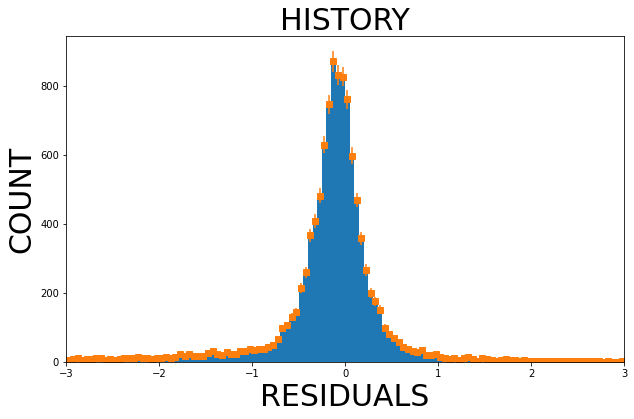

In [ ]:
               #using import library 
import pickle
import pandas as pd
                        #file opening
filename = "data/residuals_261.pkl"
infile = open(filename, 'rb') 
new_dict = pickle.load(infile) 
infile.close()

data=dict(new_dict.item())
df=pd.DataFrame(data)
            #limited range for hold outliers from fit
df[abs(df.residuals)<3]
xl=-5
xu=5
              #make figure
fig, ax = plt.subplots(figsize=(10, 6)) 
yvalues, bins, _ = plt.hist(df['residuals'], bins=200, range=(xl, xu), cumulative=False) 
binwidth=bins[2]-bins[1]
bins=bins[:len(bins)-1]

ax.set_title('HISTORY',fontsize=30)
ax.set_xlabel('RESIDUALS',fontsize=30)
ax.set_ylabel('COUNT', fontsize=30)
ax.set_xlim(-3,3)
ax.errorbar(bins+binwidth/2, yvalues, yerr=np.sqrt(yvalues), marker='s', linestyle='None')



make fit

parameters
 [ 8.07588363e+02 -8.65590333e-02  2.25451192e-01]


use covariance 
 [[ 8.30958530e+01 -1.47845529e-10 -1.54652398e-02]
 [-1.47845529e-10  8.63485869e-06 -2.55961000e-14]
 [-1.54652398e-02 -2.55961000e-14  8.63485848e-06]]
cconst 	=	 807.59 	+-	 9.12
mean value 	=	 -0.087 	+-	 0.003
sigma value 	=	 0.225 	+-	 0.003


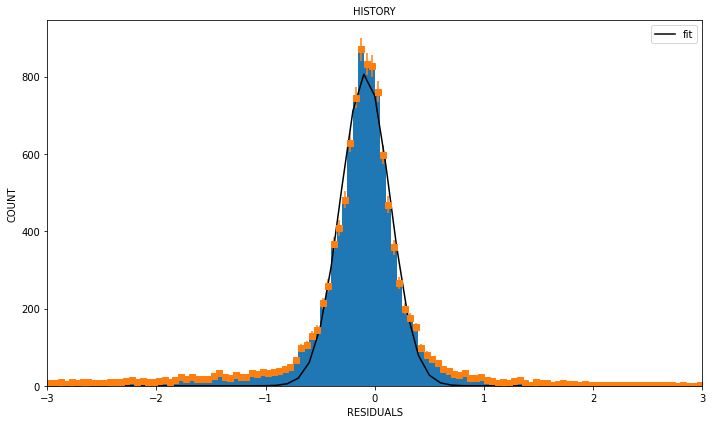

In [ ]:
     #gauss func def
def gaus(x, const, mu, sigma):
    return const * np.exp(-0.5*(x-mu)**2/sigma**2)

print("make fit")
popt_r, pcov_r = optimize.curve_fit(gaus, bins+binwidth/2, yvalues, p0=[500,0,1], full_output=False)
print("\nparameters\n", popt_r)
print("\n\nuse covariance \n", pcov_r)
print("cconst \t=\t %.2f \t+-\t %.2f" % (popt_r[0], np.sqrt(pcov_r[0,0])))
print("mean value \t=\t %.3f \t+-\t %.3f" % (popt_r[1], np.sqrt(pcov_r[1,1])))
print("sigma value \t=\t %.3f \t+-\t %.3f" % (popt_r[2], np.sqrt(pcov_r[2,2])))

      #make figure and display

fig, ax = plt.subplots(figsize=(10, 6)) 

yvalues, bins, _ = plt.hist(df['residuals'], bins=200, range=(xl, xu), cumulative=False) 
binwidth=bins[1]-bins[0]
bins=bins[:len(bins)-1]
##axes
ax.set_title('HISTORY',fontsize=10)
ax.set_xlabel('RESIDUALS',fontsize=10)
ax.set_ylabel('COUNT', fontsize=10)
ax.set_xlim(-3,3)
ax.errorbar(bins+binwidth/2, yvalues, yerr=np.sqrt(yvalues), marker='s', linestyle='None')
ax.plot(np.arange(start=xl,stop=xu,step=0.1), gaus(np.arange(start=xl,stop=xu,step=0.1), popt_r[0], popt_r[1],popt_r[2]), label='fit',c='black')
ax.legend(loc='best')
fig.tight_layout()

In [ ]:
from scipy import stats
                       #creating a data frame (division by zero) with past and function val at midpoint to pass off 
dataf=pd.DataFrame()
dataf['left bins']=np.linspace(xl,xu,200)
dataf['fit']=gaus(np.linspace(xl,xu,200), popt_r[0], popt_r[1],popt_r[2])
dataf['experimental']=yvalues
               #non zero val
dataf = dataf[dataf.experimental>0.9]
fit=gaus(np.linspace(xl,xu,200), popt_r[0], popt_r[1],popt_r[2])
ndof = len(dataf.experimental) - 1
chi2 = np.sum(((dataf.experimental- dataf.fit)**2) /(dataf.experimental))
print("\tchi2 val  =", chi2)
pvalue = 1. - stats.chi2.cdf(chi2, ndof)
print("\tp-val =", pvalue) 
print("\tfit_unsatisfactory")

	chi2 val  = 1707.8875011276027
	p-val = 0.0
	fit_unsatisfactory


4\. **Temperatures in Munich**

Get the following data file:

```bash
https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
```

which gives the temperature in Munich every day for several years.


Fit the following function to the data:

$$f(t) = a \cos(2\pi t + b)+c$$

where $t$ is the time in years.

- Make a plot of the data and the best-fit model in the range 2008 to 2012.

   - What are the best-fit values of the parameters?

   - What is the overall average temperature in Munich, and what are the typical daily average values predicted by the model for the coldest and hottest time of year?

   - What is the meaning of the $b$ parameter, and what physical sense does it have?


- Now fit the data with the function $g(x)$, which has 1 more parameter than $f(x)$.
$$g(x) = a \cos(2\pi b t + c)+d$$
   - What are the RSS for $f(x)$ and $g(x)$?
   - Use the Fisher F-test to determine whether the additional parameter is motivated.

Görüntülenen çıkış son 5000 satıra kısaltıldı.
1999.59959 19.6111
1999.60233 19.6667
1999.60507 21.4444
1999.60780 17.7222
1999.61054 16.6667
1999.61328 15.7222
1999.61602 14.3889
1999.61875 16.7222
1999.62149 17.4444
1999.62423 14.8333
1999.62697 15.7222
1999.62971 17.4444
1999.63244 18.2222
1999.63518 16.4444
1999.63792 15.6667
1999.64066 15.0556
1999.64339 14.3333
1999.64613 15.8889
1999.64887 18
1999.65161 19.2778
1999.65435 19.3333
1999.65708 17.7778
1999.65982 16.2778
1999.66256 15.5
1999.66530 17.0556
1999.66804 15.3889
1999.67077 12.3333
1999.67351 14.7222
1999.67625 17.0556
1999.67899 16.0556
1999.68172 18.6111
1999.68446 17.2778
1999.68720 17.5
1999.68994 17.2778
1999.69268 17.3889
1999.69541 17.4444
1999.69815 17.4444
1999.70089 16.6667
1999.70363 17.1111
1999.70637 16.6667
1999.70910 16
1999.71184 16.5556
1999.71458 16.7222
1999.71732 17.1667
1999.72005 18.5556
1999.72279 14.9444
1999.72553 18.4444
1999.72827 17.2778
1999.73101 17.5556
1999.73374 15.9444
1999.73648 14.5
199

NameError: ignored

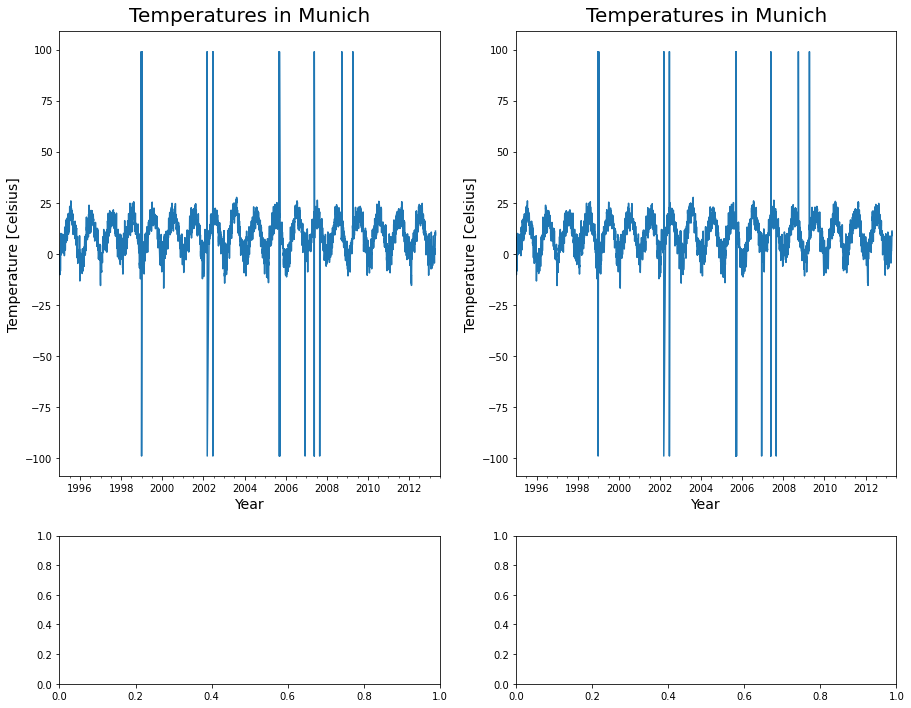

In [ ]:
#downloading the file
!wget https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt -P /
#opening the txt file with data
data = pd.read_csv('munich_temperatures_average_with_bad_data.txt', sep=" ", header=None)
data.columns = ["year", "temperature"]
data = data.dropna(how='all')
!cat munich_temperatures_average_with_bad_data.txt
#creating figure and subplots
from matplotlib.gridspec import GridSpec
fig = plt.figure(figsize=(15,12))
gs = GridSpec(2, 2, width_ratios=[1, 1], height_ratios=[3, 1])
ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1])
ax3 = fig.add_subplot(gs[2])
ax4 = fig.add_subplot(gs[3])


#setting features for the plot
ax1.set_xlim(1995, 2013.5)
ax1.xaxis.set_major_locator(MultipleLocator(2))
ax1.xaxis.set_minor_locator(AutoMinorLocator(4))
ax1.set_xlabel("Year", fontsize = 14)
ax1.set_ylabel("Temperature [Celsius]", fontsize = 14)
ax1.set_title("Temperatures in Munich", fontsize=20, verticalalignment='bottom')
ax1.plot(data['year'], data['temperature'], label = 'data')

ax2.set_xlim(1995, 2013.5)
ax2.xaxis.set_major_locator(MultipleLocator(2))
ax2.xaxis.set_minor_locator(AutoMinorLocator(4))
ax2.set_xlabel("Year", fontsize = 14)
ax2.set_ylabel("Temperature [Celsius]", fontsize = 14)
ax2.set_title("Temperatures in Munich", fontsize=20, verticalalignment='bottom')
ax2.plot(data['year'], data['temperature'], label = 'data')

#defining f(x) function -> first function to fit with
def f(x, a, b,c):
    return a * np.cos(2*math.pi*x + b) + c

#defining g(x) function -> second function to set with
def g(x, a, b,c,d):
    return a * np.cos(2*math.pi*x*b + c) + d

#range of the fit
data = data[data['year']>2008]
data = data[data['year']<2012]

#making the fit with f(x) and plotting it
popt1, pcov1 = sc.optimize.curve_fit(f, data['year'], data['temperature'], p0=[25,1,1], full_output=False)
ax1.plot(data['year'], f(data['year'], popt1[0], popt1[1], popt1[2]), label='fitted f(x) function', color = 'red')
ax1.legend()

#making the fit with g(x) and plotting it
popt2, pcov2 = sc.optimize.curve_fit(g, data['year'], data['temperature'], p0=[25,1,1,1], full_output=False)
ax2.plot(data['year'], g(data['year'], popt2[0], popt2[1], popt2[2], popt2[3]), label='fitted g(x) function', color = 'gold')
ax2.legend()


#getting the parameters
print("The best fit parameters for f(x) are:\n", "amplitude:", popt1[0],"\n shift" ,popt1[1], " \n traslation",popt1[2])
print("\n The best fit parameters for g(x) are:\n", "amplitude:", popt2[0],"\n pulse", popt2[1],"\n shift" ,popt2[2], " \n traslation",popt2[3])
print('\n b parameter is a shift on years axis corresponding to the fact that the measurements could not be performed at same time every year, but there could be an anticipation or a delay each year.')

#getting the average tempature
average = data['temperature'].mean()
print("\n The overall average temperature in Munich is", round(average,1), "celsius")
aver_min = f(data['year'], *popt1).min()
print('\nDaily average values for the coldest time during the year:',round(aver_min,1),' celsius')
aver_max = f(data['year'], *popt1).max()
print('\nDaily average values for the hottest time during the year:',round(aver_max,1),' celsius')


#Computing and printing
res_f = f(data['year'],*popt1) - data['temperature']
ax3.scatter(data['year'], res_f, marker = 'o', lw = 0, color = 'red', label = 'Residuals', s = 10)
ax3.axhline(color = 'black', linewidth = 3, linestyle = 'dashed', label = 'reference line')
ax3.set_ylim( bottom = -22, top = 22)
ax3.set_ylabel('Residuals', fontsize = 12) 
ax3.set_xlabel('Year', fontsize = 12)
ax3.xaxis.set_major_locator(MultipleLocator(1))
ax3.xaxis.set_minor_locator(AutoMinorLocator(4))
ax3.set_title("RSS", fontsize=15, verticalalignment='bottom')
ax3.legend()

res_g = g(data['year'],*popt2) - data['temperature']
ax4.scatter(data['year'], res_g, marker = 'o', lw = 0, color = 'gold', label = 'Residuals', s = 10)
ax4.axhline(color = 'black', linewidth = 3, linestyle = 'dashed', label = 'reference line')
ax4.set_ylim( bottom = -22, top = 22)
ax4.set_ylabel('Residuals', fontsize = 12) 
ax4.set_xlabel('Year', fontsize = 12)
ax4.xaxis.set_major_locator(MultipleLocator(1))
ax4.xaxis.set_minor_locator(AutoMinorLocator(4))
ax4.set_title("RSS", fontsize=15, verticalalignment='bottom')
ax4.legend()


RSS1 = np.sum(res_f**2)
RSS2 = np.sum(res_g**2)
print('\nRSS of first function:', RSS1, '\nRSS of second function:',RSS2)


#Define function for F-test

from scipy.stats import f

def Ftest(rss1, rss2, dof1, dof2, bins):
    fValue = ((rss1 - rss2)/(dof2 - dof1)) / (rss2/(bins - dof2))
    return 1. - f.cdf(fValue, dof2 - dof1, bins - dof2)

N = len(data['year'])

y1 = f(data['year'], *popt1)
y2 = g(data['year'], *popt2)

#Calling the F test for doing fx and gx
CL = Ftest(RSS1, RSS2, 3, 4, N)

if CL < 0.1:
    print ('\nAdditional parameter is needed since CL =',CL,'.')
else:
    print('\nAdditional parameter is not needed since CL =',CL,'.')